# Cinemática de Fluidos

O vetor velocidade é uma função de 4 dimensões. É uma função de 3 variáveis espaciais, bem como uma variável temporal.
Vale ressaltar que para os casos aqui abordados, as expressões são derivadas para uma única partícula presente no escoamento.

$\vec{V}=\vec{V}(x,y,z,t)$  
<br>$\vec{V}=u(x,y,z,t)\hat{\imath} + v(x,y,z,t)\hat{\jmath} + w(x,y,z,t)\hat{k}$

### Campo de aceleração  

Logo, deve-se aplicar a derivada do tempo para obter o vetor aceleração.   
<br>$\vec{a}(x,y,z,t)=\frac{d(\vec{V})}{dt}=\frac{\partial(\vec{V})}{\partial t} +u\frac{\partial(\vec{V})}{\partial x}+v\frac{\partial(\vec{V})}{\partial y}+ w\frac{\partial(\vec{V})}{\partial z} $  

$\frac{d(\vec{V})}{dt}=\vec{a}=\vec{a}(x,y,z,t)$  
<br>No entanto, essa expressão é expressa de maneira mais útil como:  
<br>$\vec{a}(x,y,z,t)=\frac{d(\vec{V})}{dt}=\frac{\partial(\vec{V})}{\partial t} +u\frac{\partial(\vec{V})}{\partial x}+v\frac{\partial(\vec{V})}{\partial y}+ w\frac{\partial(\vec{V})}{\partial z} $  
<br>Assim, a expressão mostrada acima pode ser expressa de forma mais concisa como: <br>   
<br>$\vec{a}(x,y,z,t)=\frac{d(\vec{V})}{dt}= \frac{\partial(\vec{V})}{\partial t}+ (\vec{V} \centerdot  \vec{\nabla})\vec{V}$    <br>
<br>O operador de gradiente derivará cada vetor de velocidade em todas as três dimensões espaciais $\hat{i} , \hat{j} , \hat{k}$.
Talvez seja mais útil para plotar e visualizar o vetor aceleração dividindo-o em três componentes, pois o operador gradiente os mantém misturados.  <br>
<br>$\vec{\nabla}=\frac{\partial}{\partial x}\hat{i} + \frac{\partial}{\partial y}\hat{j} + \frac{\partial}{\partial z}\hat{k}$  
<br>Da mesma forma que funções para cada componente da velocidade foram usadas para expressar o vetor velocidade, funções para cada componente da aceleração também serão usadas para facilitar a visualização do vetor aceleração.
<br>$a_x=\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y}+ w\frac{\partial u}{\partial z}$  
<br>$a_y=\frac{\partial v}{\partial t} + u\frac{\partial v}{\partial x} + v\frac{\partial v}{\partial y}+ w\frac{\partial v}{\partial z}$  
<br>$a_z=\frac{\partial w}{\partial t} + u\frac{\partial w}{\partial x} + v\frac{\partial w}{\partial y}+ w\frac{\partial w}{\partial z}$  
<br>$\vec{a}=a_x\hat{i}+a_y\hat{j}+a_z\hat{k}$

In [1]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

In [2]:
#formulando o problema

#estabelecendo variáveis independentes
x,y,z,t =smp.symbols('x y z t')

#estabelecendo funções dos componentes de velocidade
u,v,w =smp.symbols('u v w', cls=smp.Function)
u=u(x,y,z,t)
v=v(x,y,z,t)
w=w(x,y,z,t)

#estabelendo vetor velocidade e seu módulo
Vel= smp.Matrix([u,v,w])
norm_Vel=Vel.norm()

#estabelendo vetor de aceleração e seu módulo
Ax= smp.diff(u,t)+ u*smp.diff(u,x)+ v*smp.diff(u,y) + w*smp.diff(u,z)
Ay= smp.diff(v,t)+ u*smp.diff(v,x)+ v*smp.diff(v,y) + w*smp.diff(v,z)
Az= smp.diff(w,t)+ u*smp.diff(w,x)+ v*smp.diff(w,y) + w*smp.diff(w,z)
a= smp.Matrix([Ax,Ay,Az])
norm_a=a.norm()

## Exemplo 1

O escoamento bidimensional incompressível estacionário é dado por:    
$\vec{V}= (u,v) = (0.5+ 0.8x)\hat{i} + (1.5 - 0.8y)\hat{j}$    
Trace os campos de velocidade e aceleração e encontre os pontos de equilíbrio e estagnação, para os limites dados:   
$-2<x<2$  
$0<y<5$

In [3]:
#Establishing functions for u,v and w
u=0.5+0.8*x
v=1.5-0.8*y
w=0
Vel= smp.Matrix([u,v,w])
norm_Vel=Vel.norm()


#Finding stagnation coordinates
x_stag= smp.solve(u,x)
y_stag= smp.solve(v,y)
stag_coord =np.array([x_stag,y_stag])


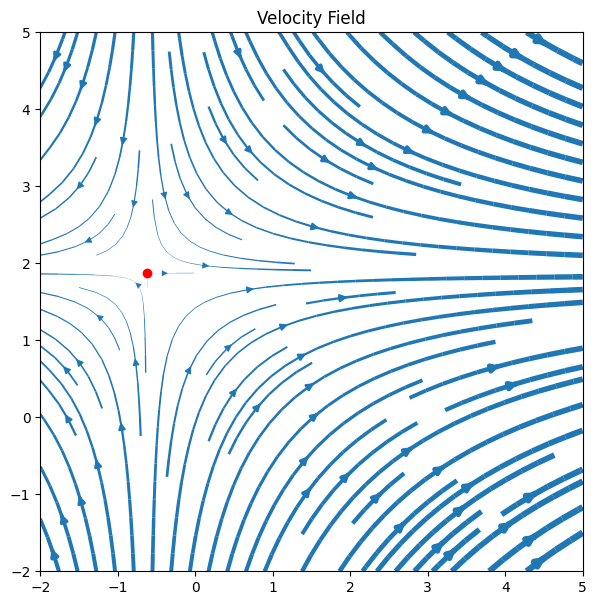

In [4]:
#Velocity and acceleration fields

#initiatting mesh-grid
_ = np.linspace(-2,5,1000)
X,Y= np.meshgrid(_,_)
U= smp.lambdify([x],u)
V= smp.lambdify([y],v)
Abs_Vel=smp.lambdify([x,y],norm_Vel)

#velocity field
fig, ax= plt.subplots(1,1,figsize=(7,7))
lw=5*Abs_Vel(X,Y)/Abs_Vel(X,Y).max()
ax.streamplot(X,Y,U(X),V(Y),linewidth=lw)
ax.plot(stag_coord[0],stag_coord[1],'o',color='red')
ax.set_title('Velocity Field')
plt.show()

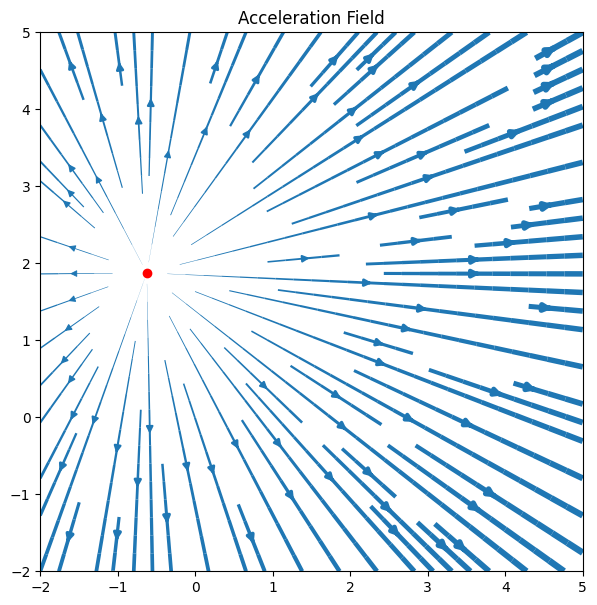

In [5]:
#acceleration field
fig, ax= plt.subplots(1,1,figsize=(7,7))
ax.set_title('Acceleration Field')

Ax= smp.diff(u,t)+ u*smp.diff(u,x)+ v*smp.diff(u,y) + w*smp.diff(u,z)
Ay= smp.diff(v,t)+ u*smp.diff(v,x)+ v*smp.diff(v,y) + w*smp.diff(v,z)
Az= smp.diff(w,t)+ u*smp.diff(w,x)+ v*smp.diff(w,y) + w*smp.diff(w,z)
a= smp.Matrix([Ax,Ay,Az])
norm_a=a.norm()

AX= smp.lambdify([x],Ax)
AY= smp.lambdify([y],Ay)
Abs_Acc=smp.lambdify([x,y],norm_a)
lw=5*Abs_Acc(X,Y)/Abs_Acc(X,Y).max()
ax.streamplot(X,Y,AX(X),AY(Y),linewidth=lw)
ax.plot(stag_coord[0],stag_coord[1],'o',color='red')
plt.show()

### Ambos os gráficos são mostrados abaixo para ilustrar a velocidade e a aceleração em qualquer ponto

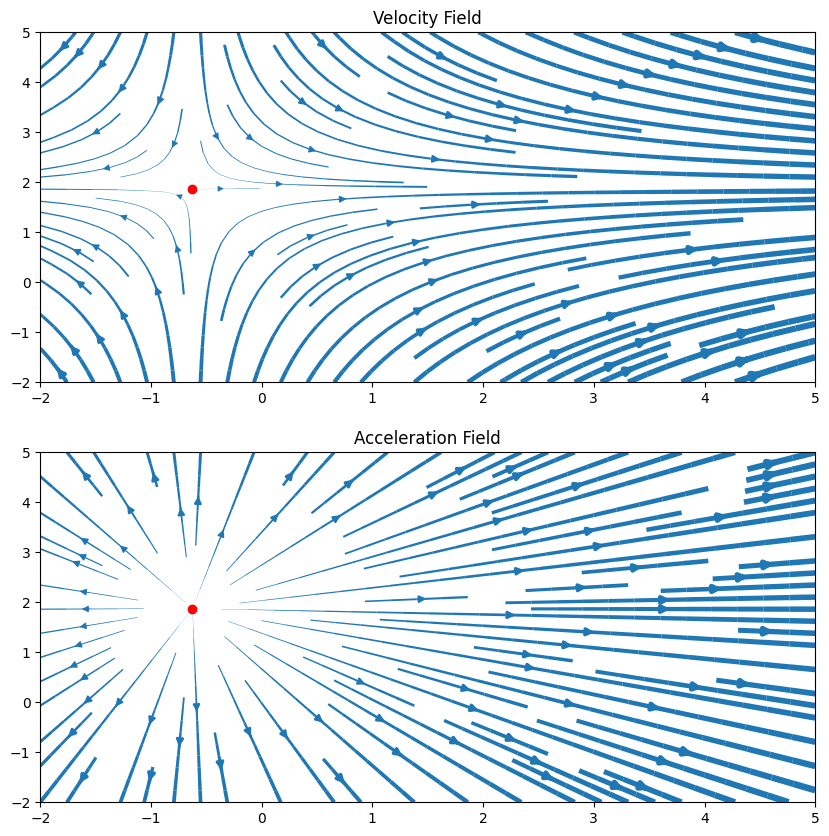

In [6]:
fig, axes= plt.subplots(2,figsize=(10,10))
ax=axes[0]
lw=5*Abs_Vel(X,Y)/Abs_Vel(X,Y).max()
ax.streamplot(X,Y,U(X),V(Y),linewidth=lw)
ax.plot(stag_coord[0],stag_coord[1],'o',color='red')
ax.set_title('Velocity Field')

ax=axes[1]
lw=5*Abs_Acc(X,Y)/Abs_Acc(X,Y).max()
ax.streamplot(X,Y,AX(X),AY(Y),linewidth=lw)
ax.plot(stag_coord[0],stag_coord[1],'o',color='red')
ax.set_title('Acceleration Field')
plt.show()

## Exemplo 2

O escoamento permanente e incompressível é dado por:    
<br> $\vec{V}=(0.523-1.88x+ 3.94y)\hat{i} + (-2.44+1.26x + 1.88y)\hat{j}$  
<br>Calcule a aceleração em $(x,y)=(-1.55,2.07)$

In [7]:
#Establishing functions for u,v and w
u=0.523-1.88*x+ 3.94*y
v=-2.44+1.26*x + 1.88*y
w=0

In [8]:
#setting up the velocity vector
Vel= smp.Matrix([u,v,w])
norm_Vel=Vel.norm()

In [9]:
#setting up the acceleration vector
Ax= smp.diff(u,t)+ u*smp.diff(u,x)+ v*smp.diff(u,y) + w*smp.diff(u,z)
Ay= smp.diff(v,t)+ u*smp.diff(v,x)+ v*smp.diff(v,y) + w*smp.diff(v,z)
Az= smp.diff(w,t)+ u*smp.diff(w,x)+ v*smp.diff(w,y) + w*smp.diff(w,z)
a= smp.Matrix([Ax,Ay,Az])
norm_a=a.norm()

In [10]:
#initiatting mesh-grid
_ = np.linspace(-5,5,100)
X,Y= np.meshgrid(_,_)

In [11]:
#transforming Symbolic expressions into number array
U= smp.lambdify([x,y],u)
V= smp.lambdify([x,y],v)
Abs_Vel=smp.lambdify([x,y],norm_Vel)
AX= smp.lambdify([x],Ax)
AY= smp.lambdify([y],Ay)
Abs_Acc=smp.lambdify([x,y],norm_a)

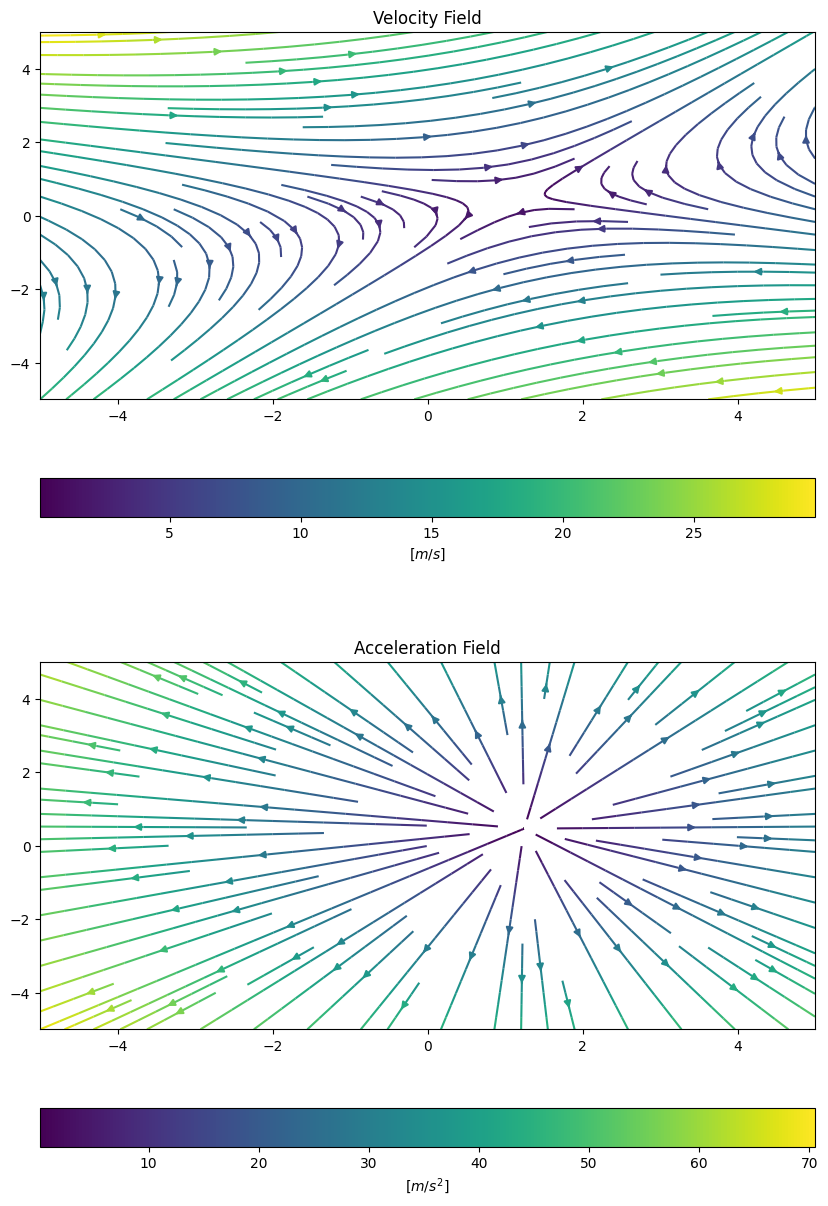

In [12]:
fig, axes= plt.subplots(2,figsize=(10,15))
ax=axes[0]
m=ax.streamplot(X,Y,U(X,Y),V(X,Y),color=Abs_Vel(X,Y))
ax.set_title('Velocity Field')
fig.colorbar(m.lines,label=r'$[m/s]$',orientation='horizontal')

ax=axes[1]
acc=ax.streamplot(X,Y,AX(X),AY(Y),color=Abs_Acc(X,Y))
fig.colorbar(acc.lines,label=r'$[m/s^2]$',orientation='horizontal')
ax.set_title('Acceleration Field')
plt.show()


## Exemplo 3

O escoamento em uma região é descrito por:  
<br>$\vec{V}=(xz^2e^{-t})\hat{i} + 5(zsin(x)e^{-2t})\hat{j} + (zcos(x)e^{-3t})\hat{k})$  
<br>Mostre a linha de corrente para todos os seis planos de velocidade e aceleração  

In [13]:
#Setting up the functions
u=x*(z**2)*smp.exp(-t)
v=5*smp.sin(x)*z*smp.exp(-2*t)
w=smp.cos(x)*z*smp.exp(-3*t)

In [14]:
#setting up the velocity vector
Vel= smp.Matrix([u,v,w])
norm_Vel=Vel.norm()

In [15]:
#setting up the acceleration vector
Ax= smp.diff(u,t)+ u*smp.diff(u,x)+ v*smp.diff(u,y) + w*smp.diff(u,z)
Ay= smp.diff(v,t)+ u*smp.diff(v,x)+ v*smp.diff(v,y) + w*smp.diff(v,z)
Az= smp.diff(w,t)+ u*smp.diff(w,x)+ v*smp.diff(w,y) + w*smp.diff(w,z)
a= smp.Matrix([Ax,Ay,Az])
norm_a=a.norm()

In [16]:
#initiating meshgrid
xx=np.linspace(0,20,100)
yy=np.linspace(-3,3,25)
zz=np.linspace(0,4,20)
tt=np.linspace(0,20,120)
#X,Y,Z,T=np.meshgrid(xx,yy,zz,tt)

In [17]:
#transforming symbolic expressions into numeric expressions
U=smp.lambdify([x,z,t],u) #for u(x,z,t)
V=smp.lambdify([x,z,t],v)
W=smp.lambdify([x,z,t],w)
Abs_Vel=smp.lambdify([x,z,t],norm_Vel)

AX=smp.lambdify([x,z,t],Ax)
AY=smp.lambdify([x,z,t],Ay)
AZ=smp.lambdify([x,z,t],Az)
Abs_Acc=smp.lambdify([x,z,t],norm_a)

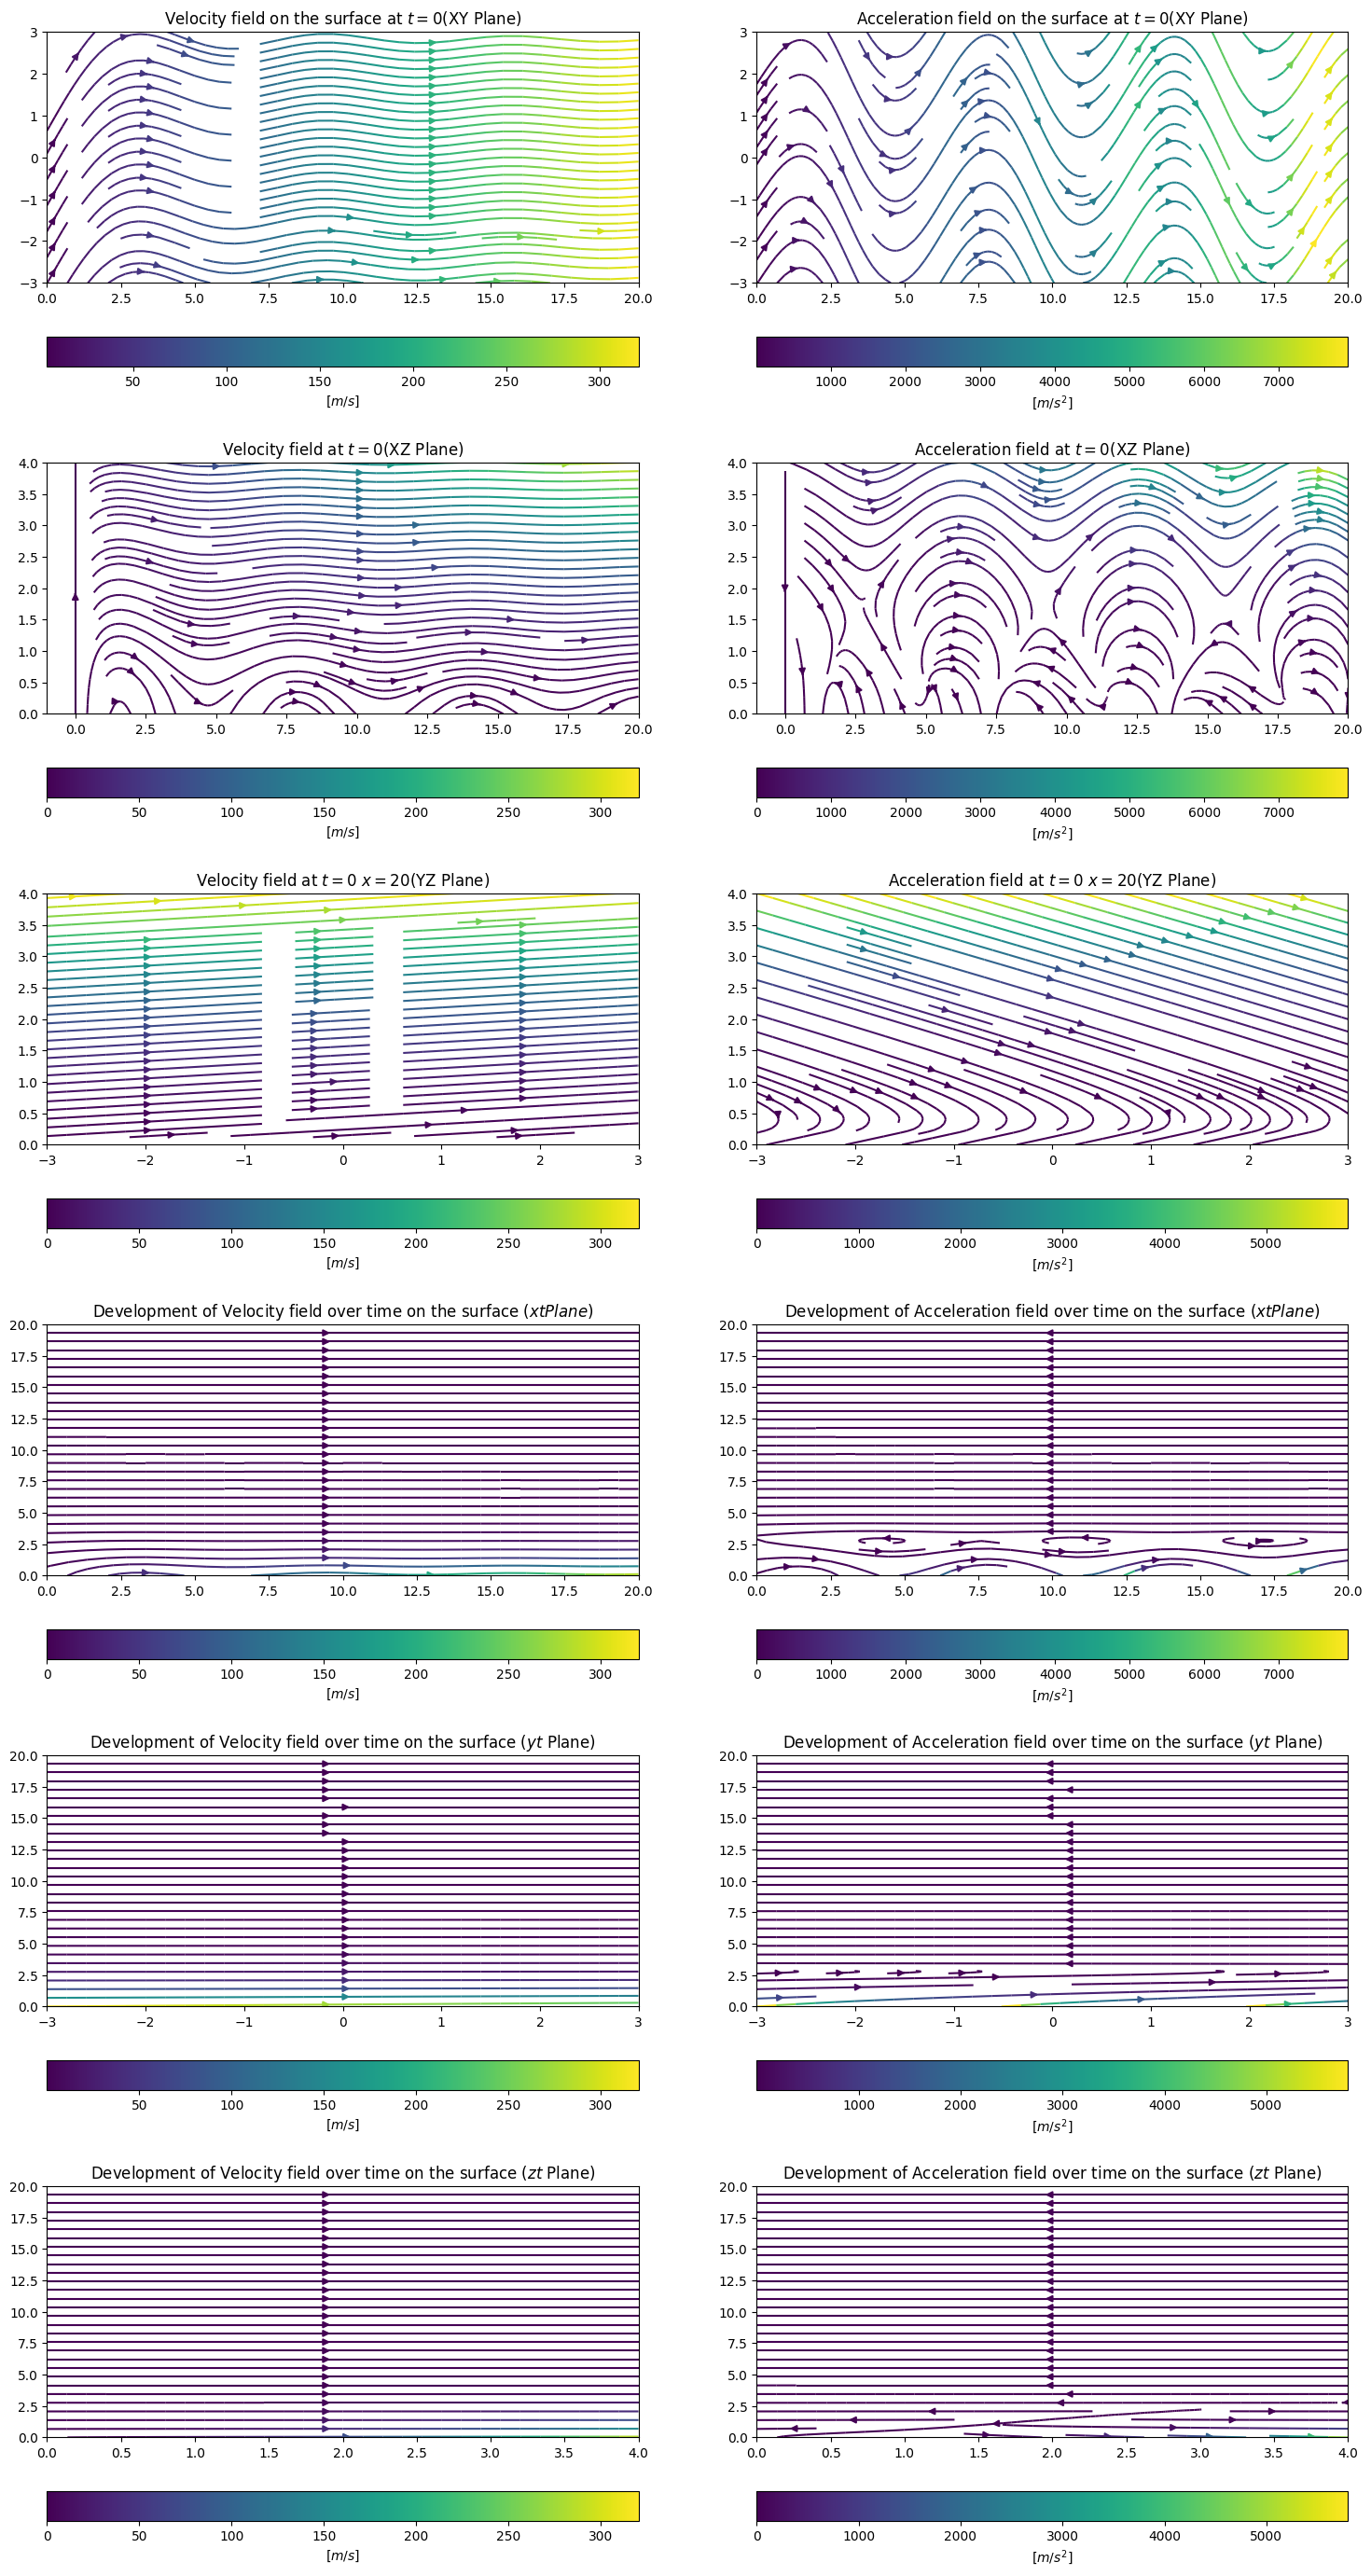

In [18]:
#plotting
fig, axes= plt.subplots(6,2, figsize=(18,35))
ax=axes[0][0]
X,Y=np.meshgrid(xx,yy)
m=ax.streamplot(X,Y,U(X,4,0),V(X,4,0),color=Abs_Vel(X,4,0))
ax.set_title(r'Velocity field on the surface at $t=0$(XY Plane)')
fig.colorbar(m.lines,label=r'$[m/s]$', orientation='horizontal')

ax=axes[0][1]
acc=ax.streamplot(X,Y,AX(X,4,0),AY(X,4,0),color=Abs_Acc(X,4,0))
ax.set_title(r'Acceleration field on the surface at $t=0$(XY Plane)')
fig.colorbar(acc.lines,label=r'$[m/s^2]$', orientation='horizontal')

ax=axes[1][0]
X,Z=np.meshgrid(xx,zz)
m=ax.streamplot(X,Z,U(X,Z,0),W(X,Z,0),color=Abs_Vel(X,Z,0))
ax.set_title(r'Velocity field at $t=0$(XZ Plane)')
fig.colorbar(m.lines,label=r'$[m/s]$', orientation='horizontal')

ax=axes[1][1]
acc=ax.streamplot(X,Z,AX(X,Z,0),AZ(X,Z,0),color=Abs_Acc(X,Z,0))
ax.set_title(r'Acceleration field at $t=0$(XZ Plane)')
fig.colorbar(acc.lines,label=r'$[m/s^2]$', orientation='horizontal')

ax=axes[2][0]
Y,Z=np.meshgrid(yy,zz)
m=ax.streamplot(Y,Z,V(20,Z,0),W(20,Z,0),color=Abs_Vel(20,Z,0))
ax.set_title(r'Velocity field at $t=0$ $x=20$(YZ Plane)')
fig.colorbar(m.lines,label=r'$[m/s]$', orientation='horizontal')

ax=axes[2][1]
acc=ax.streamplot(Y,Z,AY(20,Z,0),AZ(20,Z,0),color=Abs_Acc(20,Z,0))
ax.set_title(r'Acceleration field at $t=0$ $x=20$(YZ Plane)')
fig.colorbar(acc.lines,label=r'$[m/s^2]$', orientation='horizontal')

ax=axes[3][0]
X,T=np.meshgrid(xx,tt)
m=ax.streamplot(X,T,U(X,4,T),V(X,4,T),color=Abs_Vel(X,4,T))
ax.set_title(r'Development of Velocity field over time on the surface $(xt Plane)$')
fig.colorbar(m.lines,label=r'$[m/s]$', orientation='horizontal')

ax=axes[3][1]
acc=ax.streamplot(X,T,AX(X,4,T),AY(X,4,T),color=Abs_Acc(X,4,T))
ax.set_title(r'Development of Acceleration field over time on the surface $(xt Plane)$')
fig.colorbar(acc.lines,label=r'$[m/s^2]$', orientation='horizontal')

ax=axes[4][0]
Y,T=np.meshgrid(yy,tt)
m=ax.streamplot(Y,T,U(20,4,T),V(20,4,T),color=Abs_Vel(20,4,T))
ax.set_title(r'Development of Velocity field over time on the surface ($yt$ Plane)')
fig.colorbar(m.lines,label=r'$[m/s]$', orientation='horizontal')

ax=axes[4][1]
acc=ax.streamplot(Y,T,AX(20,4,T),AY(20,4,T),color=Abs_Acc(20,4,T))
ax.set_title(r'Development of Acceleration field over time on the surface ($yt$ Plane)')
fig.colorbar(acc.lines,label=r'$[m/s^2]$', orientation='horizontal')

ax=axes[5][0]
Z,T=np.meshgrid(zz,tt)
m=ax.streamplot(Z,T,U(20,Z,T),W(20,Z,T),color=Abs_Vel(20,Z,T))
ax.set_title(r'Development of Velocity field over time on the surface ($zt$ Plane)')
fig.colorbar(m.lines,label=r'$[m/s]$', orientation='horizontal')

ax=axes[5][1]
acc=ax.streamplot(Z,T,AX(20,Z,T),AZ(20,Z,T),color=Abs_Acc(20,Z,T))
ax.set_title(r'Development of Acceleration field over time on the surface ($zt$ Plane)')
fig.colorbar(acc.lines,label=r'$[m/s^2]$', orientation='horizontal')

plt.show()